In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path

In [2]:
base = Path().resolve().parent
file_path = base / 'data' / 'medicare_data.parquet'


In [3]:
df = pd.read_parquet(file_path)

In [4]:
df.describe()

,year
count,444158.000000
mean,2021.987477
std,0.819581
min,2021.000000
25%,2021.000000
50%,2022.000000
75%,2023.000000
max,2023.000000


In [23]:
df.Rndrng_Prvdr_CCN.value_counts()

Rndrng_Prvdr_CCN
330101    1104
100007    1096
330214    1015
240010     944
080001     882
          ... 
330166       1
050192       1
440239       1
100106       1
670131       1
Name: count, Length: 3096, dtype: int64

In [5]:
df.head(2)

,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt,year
0,010001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,01,36301,AL,1,Metropolitan area core: primary flow within an...,023,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,30,160063.4,36794.266667,33141.4,2021
1,010001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,01,36301,AL,1,Metropolitan area core: primary flow within an...,024,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,16,107171.125,26893.9375,22705.6875,2021


In [6]:
import numpy as np

num_cols = ['Tot_Dschrgs', 'Avg_Submtd_Cvrd_Chrg',
            'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt', 
            'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA']

df[num_cols] = df[num_cols].replace('', np.nan)
df[num_cols] = df[num_cols].astype('float')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444158 entries, 0 to 444157
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Rndrng_Prvdr_CCN           444158 non-null  object 
 1   Rndrng_Prvdr_Org_Name      444158 non-null  object 
 2   Rndrng_Prvdr_City          444158 non-null  object 
 3   Rndrng_Prvdr_St            444158 non-null  object 
 4   Rndrng_Prvdr_State_FIPS    444158 non-null  float64
 5   Rndrng_Prvdr_Zip5          444158 non-null  float64
 6   Rndrng_Prvdr_State_Abrvtn  444158 non-null  object 
 7   Rndrng_Prvdr_RUCA          443477 non-null  float64
 8   Rndrng_Prvdr_RUCA_Desc     444158 non-null  object 
 9   DRG_Cd                     444158 non-null  object 
 10  DRG_Desc                   444158 non-null  object 
 11  Tot_Dschrgs                444158 non-null  float64
 12  Avg_Submtd_Cvrd_Chrg       444158 non-null  float64
 13  Avg_Tot_Pymt_Amt           44

In [25]:
df.Avg_Submtd_Cvrd_Chrg.max()

10418932.783

In [8]:
df.isnull().sum()

Rndrng_Prvdr_CCN               0
Rndrng_Prvdr_Org_Name          0
Rndrng_Prvdr_City              0
Rndrng_Prvdr_St                0
Rndrng_Prvdr_State_FIPS        0
Rndrng_Prvdr_Zip5              0
Rndrng_Prvdr_State_Abrvtn      0
Rndrng_Prvdr_RUCA            681
Rndrng_Prvdr_RUCA_Desc         0
DRG_Cd                         0
DRG_Desc                       0
Tot_Dschrgs                    0
Avg_Submtd_Cvrd_Chrg           0
Avg_Tot_Pymt_Amt               0
Avg_Mdcr_Pymt_Amt              0
year                           0
dtype: int64

In [9]:
df['Rndrng_Prvdr_Org_Name'][df['Rndrng_Prvdr_RUCA'].isnull()].value_counts()

Rndrng_Prvdr_Org_Name
Yale-New Haven Hospital                 239
Hartford Hospital                       180
Stamford Hospital                        87
Norwalk Hospital                         61
Hospital Of Central Connecticut, The     57
Waterbury Hospital                       53
Desoto Memorial Hospital                  4
Name: count, dtype: int64

In [10]:
df['Rndrng_Prvdr_RUCA_Desc'].value_counts()

Rndrng_Prvdr_RUCA_Desc
Metropolitan area core: primary flow within an urbanized area of 50,000 and greater                     384369
Micropolitan area core: primary flow within an urban cluster of 10,000 to 49,999                         32929
Secondary flow 30% to <50% to a larger urbanized area of 50,000 and greater                               7224
Metropolitan area high commuting: primary flow 30% or more to a urbanized area of 50,000 and greater      6620
Small town core: primary flow within an urban cluster of 2,500 to 9,999                                   4973
Secondary flow 30% to <50% to a urbanized area of 50,000 and greater                                      2042
Unknown                                                                                                   1763
Micropolitan high commuting: primary flow 30% or more to a urban cluster of 10,000 to 49,999              1737
Rural areas: primary flow to a tract outside a urbanized area of 50,000 and greater or UC

In [11]:
## Combine RUCA codes into shorter categories and if missing -> 'unknown'

def categorize_ruca(desc):
    if pd.isna(desc) or desc == 'Unknown':
        return 'unknown'

    desc = str(desc)

    if desc.startswith('Metropolitan area core:'):
        return 'metro_core'
    elif desc.startswith('Metropolitan area high commuting:'):
        return 'metro_high_commute'
    elif desc.startswith('Metropolitan area low commuting:'):
        return 'metro_low_commute'

    elif desc.startswith('Micropolitan area core:'):
        return 'micro_core'
    elif desc.startswith('Micropolitan high commuting:'):
        return 'micro_high_commute'
    elif desc.startswith('Micropolitan low commuting:'):
        return 'micro_low_commute'

    elif desc.startswith('Small town core:'):
        return 'small_town_core'
    elif desc.startswith('Small town high commuting:'):
        return 'small_town_high_commute'
    elif desc.startswith('Small town low commuting:'):
        return 'small_town_low_commute'

    elif 'Secondary flow 30% to <50% to a larger urbanized area' in desc:
        return 'secondary_flow_metro'
    elif 'Secondary flow 30% to <50% to a urbanized area' in desc:
        return 'secondary_flow_metro'
    elif 'Secondary flow 30% to <50% to a urban cluster' in desc:
        return 'secondary_flow_micro'
    elif 'Secondary flow 30% to <50% to a urban cluster of 2,500 to 9,999' in desc:
        return 'secondary_flow_micro'

    elif desc.startswith('Rural areas:'):
        return 'rural'

    else:
        return 'unknown'


df['RUCA_category'] = df['Rndrng_Prvdr_RUCA_Desc'].apply(categorize_ruca)

In [12]:
df['RUCA_category'].value_counts()

RUCA_category
metro_core                 384369
micro_core                  32929
secondary_flow_metro         9266
metro_high_commute           6620
small_town_core              4973
unknown                      2444
micro_high_commute           1737
rural                        1184
secondary_flow_micro          302
small_town_high_commute       203
metro_low_commute              64
small_town_low_commute         35
micro_low_commute              32
Name: count, dtype: int64

In [13]:
df1 = df.copy()

In [14]:
df = df.drop(columns=['Rndrng_Prvdr_RUCA', 'DRG_Desc', 'Rndrng_Prvdr_RUCA_Desc'])

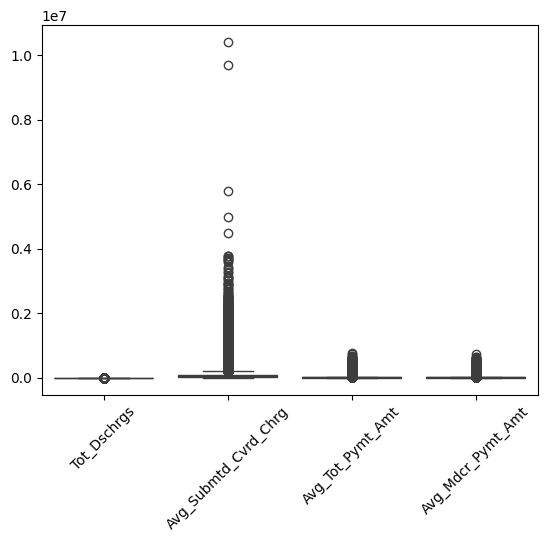

In [15]:
sns.boxplot(data=df[['Tot_Dschrgs', 'Avg_Submtd_Cvrd_Chrg',
            'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt']])
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Frequency'>

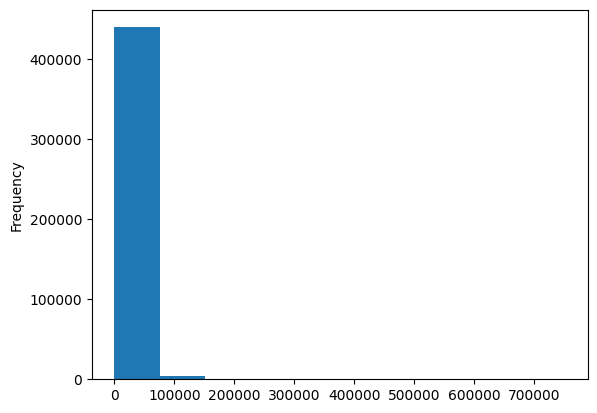

In [16]:
df['Avg_Mdcr_Pymt_Amt'].plot(kind='hist')

In [17]:
payment_cols = ['Tot_Dschrgs', 'Avg_Submtd_Cvrd_Chrg',
                'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt']

In [18]:
# check segment
drgs_table = df.groupby('DRG_Cd')[payment_cols].mean()

drgs_table.describe()

,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
count,573.000000,5.730000e+02,573.000000,573.000000
mean,18.957831,1.215388e+05,25848.918236,21183.136541
std,12.362335,1.394565e+05,30505.916034,26699.443741
min,11.000000,1.039733e+04,5146.225016,3264.537775
25%,13.719626,5.308654e+04,11278.552817,8713.200977
50%,15.909887,8.311887e+04,17445.348776,14266.013275
75%,19.512137,1.435195e+05,30275.392784,24895.960100
max,203.591565,1.818106e+06,412314.765223,388201.157513


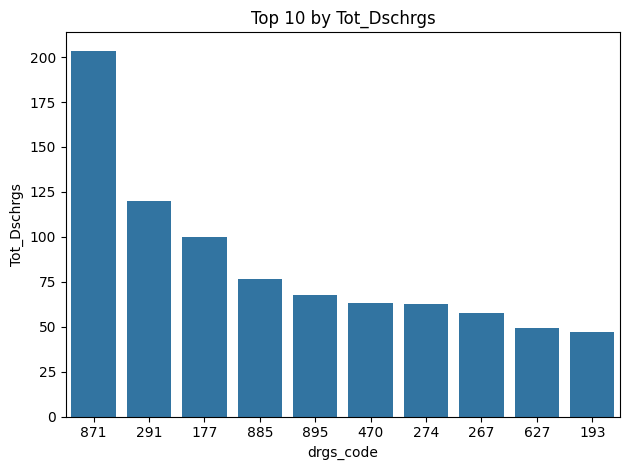

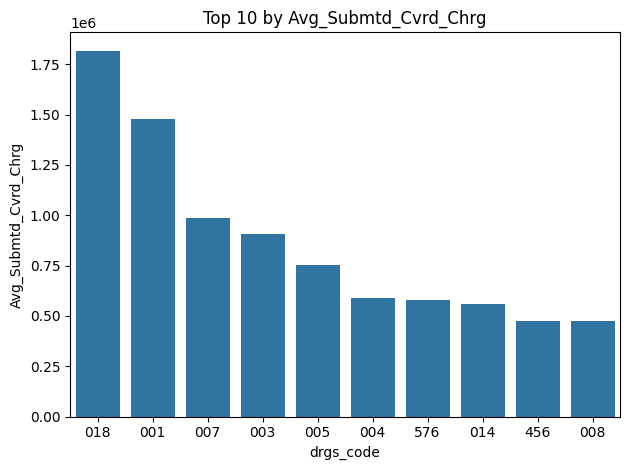

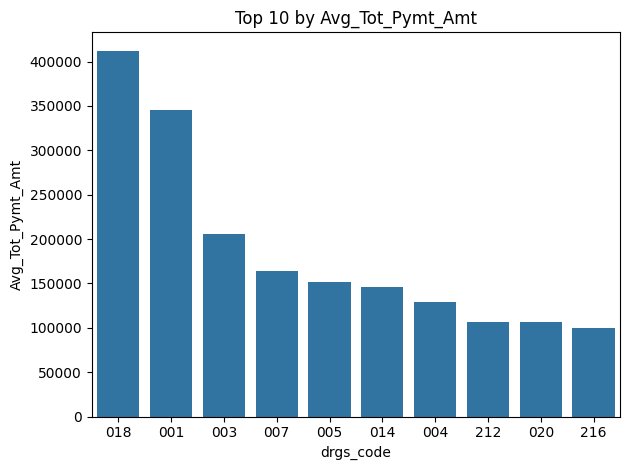

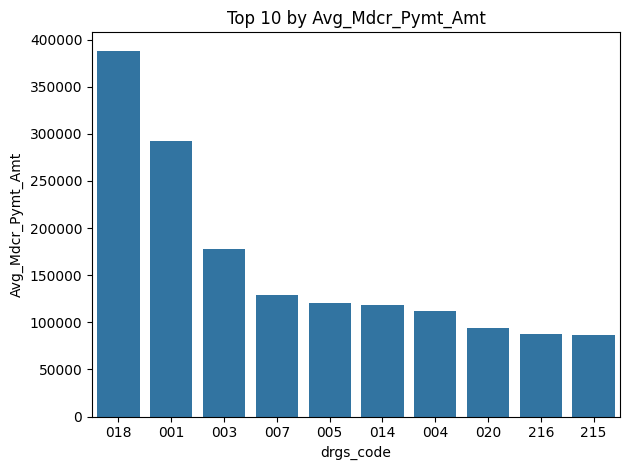

In [19]:
for x in payment_cols:
    bar_df = drgs_table[[x]].sort_values(
        by=x, ascending=False).head(10)  # top 10
    # bar sorted left to right
    sns.barplot(x=bar_df.index, y=bar_df[x], order=bar_df.index)
    plt.title(f"Top 10 by {x}")
    plt.ylabel(x)
    plt.xlabel("drgs_code")
    plt.tight_layout()
    plt.show()

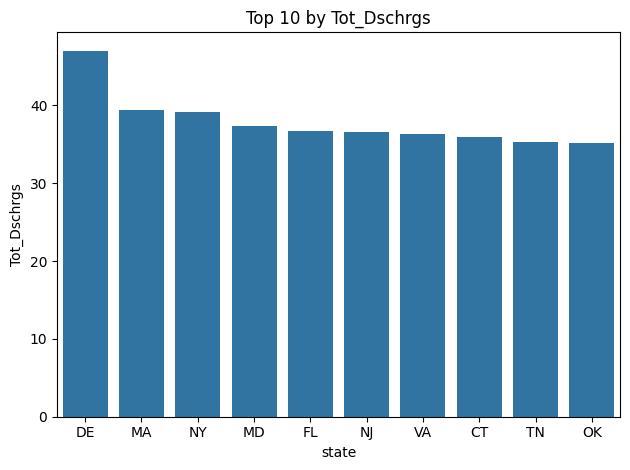

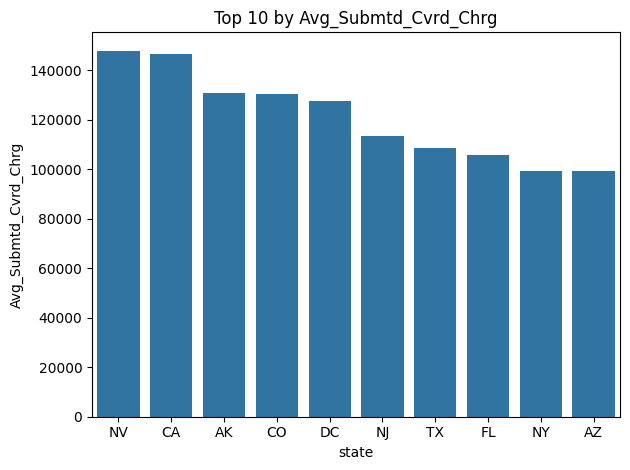

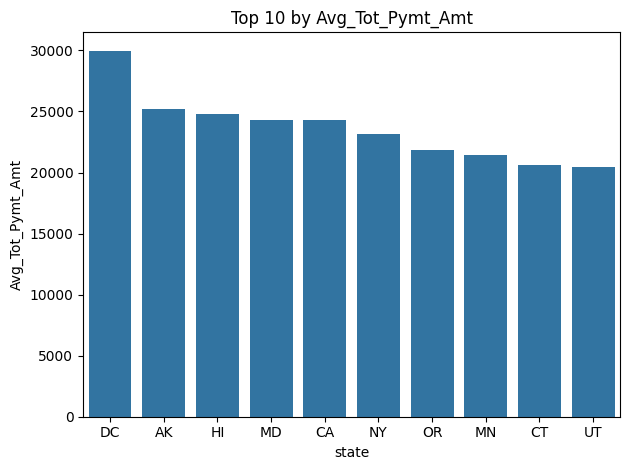

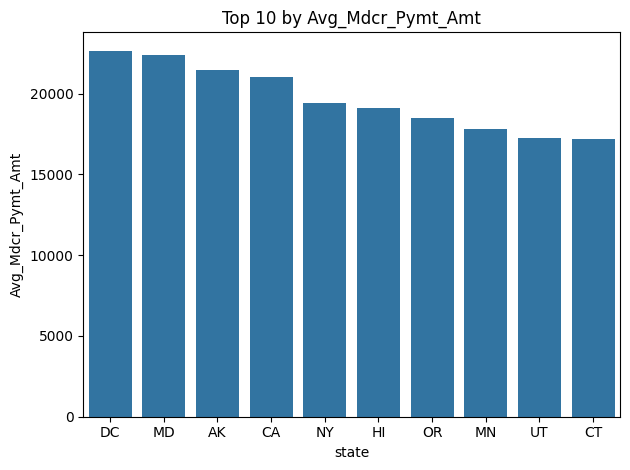

In [20]:
state_df = df.groupby('Rndrng_Prvdr_State_Abrvtn')[payment_cols].mean()

for x in payment_cols:
    bar_df1 = state_df[[x]].sort_values(
        by=x, ascending=False).head(10)  # top 10
    # bar sorted left to right
    sns.barplot(x=bar_df1.index, y=bar_df1[x], order=bar_df1.index)
    plt.title(f"Top 10 by {x}")
    plt.ylabel(x)
    plt.xlabel("state")
    plt.tight_layout()
    plt.show()

In [21]:
df.to_parquet('medicare_data_cleaned.parquet',index=False)

In [24]:
from sqlalchemy import create_engine
import os
from getpass import getpass

user = os.getenv('DB_USER')
password = os.getenv('DB_PASSWORD')

if not user:
	user = input("Enter MySQL username: ")
if not password:
	password = getpass("Enter MySQL password: ")

host = 'localhost'
port = 3306
database = 'medicare'

#  Connect to MySQL
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')

#  Upload to MySQL
df1.to_sql('medicare', con=engine, if_exists='replace', index=False)

444158